##**Detecting Brain Tumor**

The aim of this notebook is to introduce some machine learning and deep learning concept by building a machine learning model.

##**Brain Tumor Detection**

**What is a brain tumor**

A brain tumor is a mass or growth of abnormal cells in your brain.

Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain as secondary (metastatic) brain tumors.


https://www.mayoclinic.org/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084#:~:text=A%20brain%20tumor%20is%20a,tumors%20are%20cancerous%20(malignant).




## **Project framework**


**Problem Definition**

In this case, the problem is detecting brain tumor. Given brain Images that generated by Magnetic Resonance Imaging (MRI), can we detect brain tumor.

**Get the data**

The dataset used in this project is Brain MRI Images for Brain Tumor Detection obtained from
kaggle.com. The dataset consists of 7125 images.



**Import some important libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
import numpy as np
import math

## **Build input pipeline**



To build the input pipeline i'll use **tf.data module.** 
The **tf.data** API enables you to build complex input pipelines from simple, reusable pieces. For example, the pipeline for an image model might aggregate data from files in a distributed file system, apply random perturbations to each image, and merge randomly selected images into a batch for training.https://www.tensorflow.org/guide/data

**tf.data module used to build faster, more efficient deep learning data pipelines.**

The tensorflow input pipeline offers two big benefits 1.

1. first you can handle huge data sets easily by streaming them from either disk or any other cloud storage and 

2. second benefit is you can apply various type of transformation/data preprocessing which you typically need to train your deep learning model.




# Load the data from directory

In [ ]:
from zipfile import ZipFile
file_name = "brain_data_set.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


# Generates a tf.data.dataset from file images.

In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
directory = "Training",
shuffle = True,
image_size = (256, 256),
batch_size = 32
)

Found 7023 files belonging to 4 classes.


In [ ]:
class_names = data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

There are four classes in the dataset namely:

**1. Glioma :** Gliomas are tumors in the central nervous system (brain or spinal cord) and peripheral nervous system that form out of various types of glial cells (neuroglia). Glial cells are referred to as “supportive cells” because they surround, insulate, feed, repair, and protect neurons which transmit electrical signals and information throughout the nervous system. They do not directly influencing synaptic transmission and electrical signals but rather provide supportive functions for neurons and the transmission of information. They are the most common cells in the brain accounting for 80-90% of all brain cells . https://miamineurosciencecenter.com/en/conditions/brain-tumors/types/


**2. Meningioma :** A meningioma is a tumor that arises from the meninges — the membranes that surround the brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.

Most meningiomas grow very slowly, often over many years without causing symptoms. But sometimes, their effects on nearby brain tissue, nerves or vessels may cause serious disability.
https://www.mayoclinic.org/diseases-conditions/meningioma/symptoms-causes/syc-20355643


Meningiomas occur more commonly in women and are often discovered at older ages, but they may occur at any age.

**3. Notumor :** There is no tumor in the brain.


**4. pituitary :** The pituitary gland is a small, bean-shaped gland situated at the base of your brain, somewhat behind your nose and between your ears. Despite its small size, the gland influences nearly every part of your body. The hormones it produces help regulate important functions, such as growth, blood pressure and reproduction.

https://www.mayoclinic.org/diseases-conditions/pituitary-tumors/symptoms-causes/syc-20350548#:~:text=The%20pituitary%20gland%20is%20a,growth%2C%20blood%20pressure%20and%20reproduction.


## **Get information**
View the shape of the images(First batch).

In [ ]:
for img, label in data.take(1):
    print(img.shape)
    print('Labels: ',label[0:7].numpy())

(32, 256, 256, 3)
Labels:  [3 2 1 1 0 0 0]


**About the labels**

0 == Glioma

1 == Meningioma

2 == Notumor

3 == pituitary

# **Visualize**

Labels: meningioma


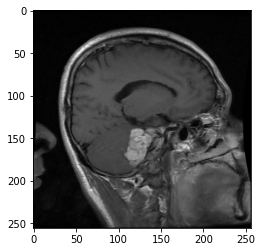

In [ ]:
#View the first image in the first batch

for img, label in data.take(1):
    print('Labels:',class_names[label[0].numpy()])
    plt.imshow(img[0].numpy().astype('uint8'))


**View more images**

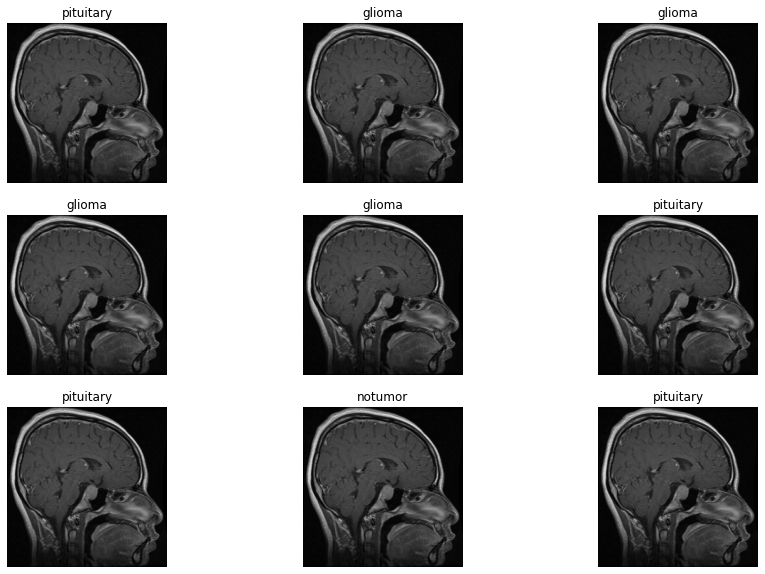

In [ ]:
plt.figure(figsize = (15, 10))

for img, label in data.take(1):
    for index in range(9):
        
        ax = plt.subplot(3, 3, index + 1)
        plt.title(class_names[label[index]])
        plt.imshow(img[0].numpy().astype('uint8'))
        plt.axis('off')

## **Split the data in to train, val and test set**

In [ ]:
print('Number of batches', len(data))

Number of batches 220


In [ ]:
# We have 7023 images,
# 32 batch_size means on batch contains 32 images
#7023/32 is equal with batch number
print(math.ceil(7023 / 32) == len(data))

True


**I'll use  84% of the dataset to train the model, 8% of the dataset  for validate the model and 8% of the dataset for test the model.**

184 batches for training

18 batches for validating

18 batches for testing

In [ ]:
train_size = 0.84
number_of_batch_train = int(len(data) * train_size)

number_of_batch_train

184

In [ ]:
def train_val_test_split(number_of_batch):
    
    train_batch = data.take(number_of_batch)
    
    val_test = data.skip(number_of_batch)
    
    validate_batch = val_test.take(18)
    test_batch = val_test.skip(18)
    
    return train_batch, validate_batch, test_batch


In [ ]:
train, val, test = train_val_test_split(184)

In [ ]:
length = [len(train), len(val), len(test) ]
    
for i in range(3):
    name = ['trainning', 'validating', 'testing']
    print('Length of ', name[i], 'Batches is' , length[i])

Length of  trainning Batches is 184
Length of  validating Batches is 18
Length of  testing Batches is 18


## **Optimize the dataset**

In [ ]:
def optmize(data):
    
    return data.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train = optmize(train)
val = optmize(val)
test = optmize(test)

## **Create layers for rescaling and resize image**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## **Build model one**

In [ ]:
input_shape = (32, 256, 256, 3)
model_one = tf.keras.Sequential([
                           
          resize_and_rescale,
          layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = input_shape),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),

          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),

          layers.Flatten(),
          layers.Dense(64, activation = "relu"),
          layers.Dense(40, activation = "relu"),
          layers.Dense(20, activation = "relu"),
          layers.Dense(35, activation = "relu"),
          layers.Dense(4, activation = "softmax")


])
model_one.build(input_shape )

In [ ]:
model_one.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (32, 60, 60, 64)         

In [ ]:
model_one.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
history_one = model_one.fit(
    train,
    epochs = 12,
    batch_size = 32,
    validation_data = val
)

Epoch 1/12
184/184 [==============================] - 622s 3s/step - loss: 0.8372 - accuracy: 0.6325 - val_loss: 0.5239 - val_accuracy: 0.7760
Epoch 2/12
184/184 [==============================] - 618s 3s/step - loss: 0.4767 - accuracy: 0.8159 - val_loss: 0.4457 - val_accuracy: 0.8403
Epoch 3/12
184/184 [==============================] - 611s 3s/step - loss: 0.3549 - accuracy: 0.8667 - val_loss: 0.3443 - val_accuracy: 0.8785
Epoch 4/12
184/184 [==============================] - 607s 3s/step - loss: 0.2939 - accuracy: 0.8908 - val_loss: 0.2261 - val_accuracy: 0.9132
Epoch 5/12
184/184 [==============================] - 608s 3s/step - loss: 0.2003 - accuracy: 0.9254 - val_loss: 0.2190 - val_accuracy: 0.9167
Epoch 6/12
184/184 [==============================] - 610s 3s/step - loss: 0.1552 - accuracy: 0.9440 - val_loss: 0.3620 - val_accuracy: 0.8906
Epoch 7/12
184/184 [==============================] - 613s 3s/step - loss: 0.1263 - accuracy: 0.9524 - val_loss: 0.2356 - val_accuracy: 0.9410

## **Test model one**

In [ ]:
score_one = model_one.evaluate(test)

18/18 [==============================] - 17s 948ms/step - loss: 0.2094 - accuracy: 0.9517


##**Build model two**

In [ ]:
input_shape = (32, 256, 256, 3)
model_two = tf.keras.Sequential([
                           
          resize_and_rescale,
          layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = input_shape),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),
          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),

          layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPool2D((2,2)),

          layers.Flatten(),
          layers.Dense(64, activation = "relu"),
          layers.Dense(40, activation = "relu"),
          layers.Dense(20, activation = "relu"),
          layers.Dense(35, activation = "relu"),
          layers.Dense(35, activation = "relu"),
          layers.Dense(4, activation = "softmax")


])
model_two.build(input_shape )

In [ ]:
model_two.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
history_two = model_two.fit(
    train,
    epochs = 15,
    batch_size = 32,
    validation_data = val
)

Epoch 1/15
184/184 [==============================] - 648s 4s/step - loss: 0.9961 - accuracy: 0.5499 - val_loss: 0.7776 - val_accuracy: 0.6545
Epoch 2/15
184/184 [==============================] - 624s 3s/step - loss: 0.5166 - accuracy: 0.7894 - val_loss: 0.4856 - val_accuracy: 0.8003
Epoch 3/15
184/184 [==============================] - 630s 3s/step - loss: 0.3887 - accuracy: 0.8451 - val_loss: 0.3251 - val_accuracy: 0.8646
Epoch 4/15
184/184 [==============================] - 637s 3s/step - loss: 0.3348 - accuracy: 0.8684 - val_loss: 0.3018 - val_accuracy: 0.8802
Epoch 5/15
184/184 [==============================] - 635s 3s/step - loss: 0.2290 - accuracy: 0.9117 - val_loss: 0.1958 - val_accuracy: 0.9358
Epoch 6/15
184/184 [==============================] - 638s 3s/step - loss: 0.1717 - accuracy: 0.9392 - val_loss: 0.2330 - val_accuracy: 0.9201
Epoch 7/15
184/184 [==============================] - 635s 3s/step - loss: 0.1604 - accuracy: 0.9402 - val_loss: 0.1585 - val_accuracy: 0.9462

## **Test model two**

In [ ]:
score_two = model_two.evaluate(test)

18/18 [==============================] - 16s 888ms/step - loss: 0.1431 - accuracy: 0.9571


**store training and validation values**


In [ ]:
model_one_acc = history_one.history['accuracy']
model_one_val_acc = history_one.history['val_accuracy']

model_one_loss = history_one.history['loss']
model_one_val_loss = history_one.history['val_loss']

In [ ]:
model_two_acc = history_two.history['accuracy']
model_two_val_acc = history_two.history['val_accuracy']

model_two_loss = history_two.history['loss']
model_two_val_loss = history_two.history['val_loss']

In [ ]:
def train_vs_val(epoch, train_acc, val_acc, label_train_acc, label_val_acc, title ):


  plt.figure(figsize = (8,6))
  plt.plot(range(epoch), train_acc, label = label_train_acc)
  plt.plot(range(epoch), val_acc, label = label_val_acc)
  plt.legend(loc = 'lower right')
  plt.title(title)

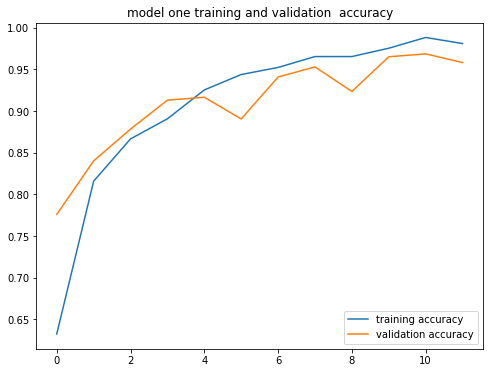

In [ ]:

title_one = 'model one training and validation  accuracy'
model_one_acc_label = 'training accuracy'
model_one_val_acc_label = 'validation accuracy'


train_vs_val(12, model_one_acc,model_one_val_acc,model_one_acc_label,model_one_val_acc_label, title_one)

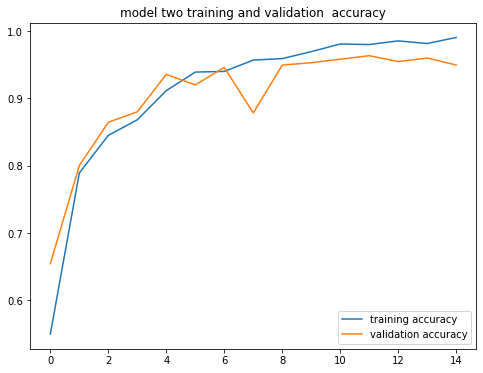

In [ ]:
title_two = 'model two training and validation  accuracy'
model_two_acc_label = 'training accuracy'
model_two_val_acc_label = 'validation accuracy'

train_vs_val(15, model_two_acc,model_two_val_acc,model_two_acc_label, model_two_val_acc_label , title_two)


## Comparing the two models

 **Model_one** accuracy: 0.9811, val_accuracy: 0.9583, test_accuracy: 0.9517

 **Model_two** accuracy: 0.9907, val_accuracy: 0.9497, test_accuracy: 0.9571.

 In model one the number gap between accuracy, val_accuracy and test_accuracy is smaller than the number gap in Model_two accuracy, val_accuracy and test_accuracy. Due to this reason i'll choose model_one as final model.

**Make prediction/ inference on sample data**

First image to predict
The actual label glioma
predicted labe :  glioma


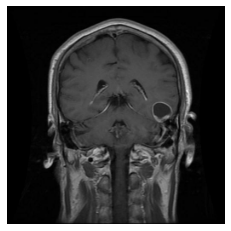

In [ ]:
for img, label in data.take(1):
    
    first_image = img[0].numpy().astype('uint8')
    first_label = label[0].numpy()
    print('First image to predict')
    plt.imshow(first_image)
    print('The actual label', class_names[first_label])
     
    #img contains 32 image
    img_predict = model_one.predict(img)
    class_index = np.argmax(img_predict[0])
    print('predicted labe : ', class_names[class_index])
    plt.axis("off")

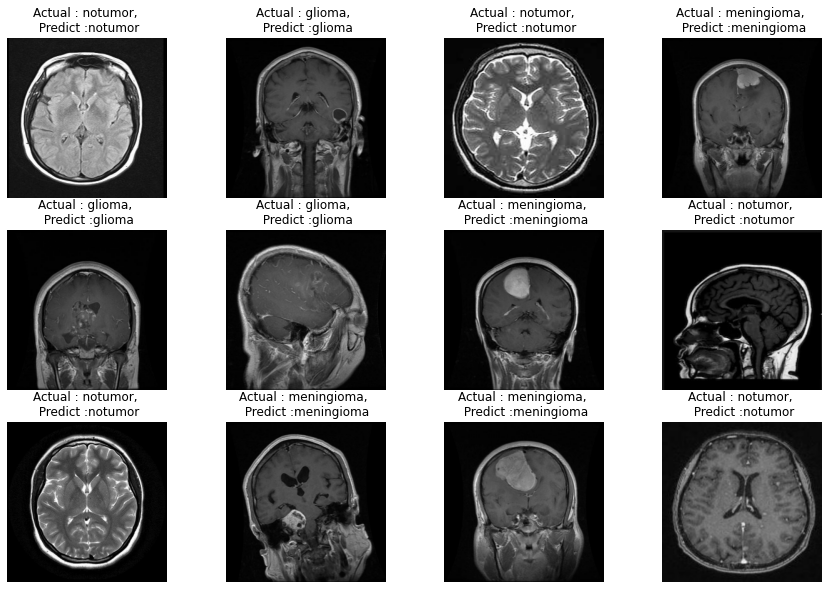

In [ ]:
plt.figure(figsize = (15, 10))
for img, label in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)        
        first_image = img[i].numpy().astype('uint8')
        first_label = label[i].numpy()
        plt.imshow(first_image)
        actual = class_names[first_label]

        #img contains 32 image
        img_predict = model_one.predict(img)
        class_index = np.argmax(img_predict[i])
        predict =  class_names[class_index]
        plt.title(f'Actual : { actual}, \n Predict :{ predict}')
        plt.axis("off")